# 1- Importamos las librerias que vamos a utilizar

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import pickle

# 2- Importamos los datos y los analizamos

In [3]:
df= pd.read_csv('./Data/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Comprobamos que tipo de datos tenemos y si tenemos valores nulos (Nan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Al tener Nan, los eliminamos

In [18]:
df= df.dropna()

Despues de eliminar los Nan comprobamos cuantos datos nos quedan para trabajar.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


Observamos como son los datos que nos quedan despues de eliminar los nulos y vemos que tenemos que normalizar los datos debido a la disparidad de valores de los mismos.

In [20]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [49]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [51]:
df_scaled.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,0.497984,0.502267,0.384500,0.489383,0.580133,0.407644,0.490098,0.500973,0.499476,0.403282
std,0.114238,0.133835,0.153865,0.135038,0.117050,0.146292,0.134035,0.139289,0.154685,0.490678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.425647,0.423434,0.272304,0.404565,0.507435,0.299173,0.400057,0.410452,0.395048,0.000000
50%,0.493723,0.507286,0.366982,0.490199,0.577314,0.402079,0.488659,0.502198,0.499168,0.000000
75%,0.568195,0.586226,0.478240,0.572493,0.654291,0.508867,0.583836,0.595331,0.607399,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comprobamos si tenemos balanceada la muestra

In [52]:
df['Potability'].value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

Representamsos el heat map para ver como de correlacionadas estan las variables, por si debemos quitar alguna columna, vemos que no estan muy correlacionadas, asi que las dejamos todas

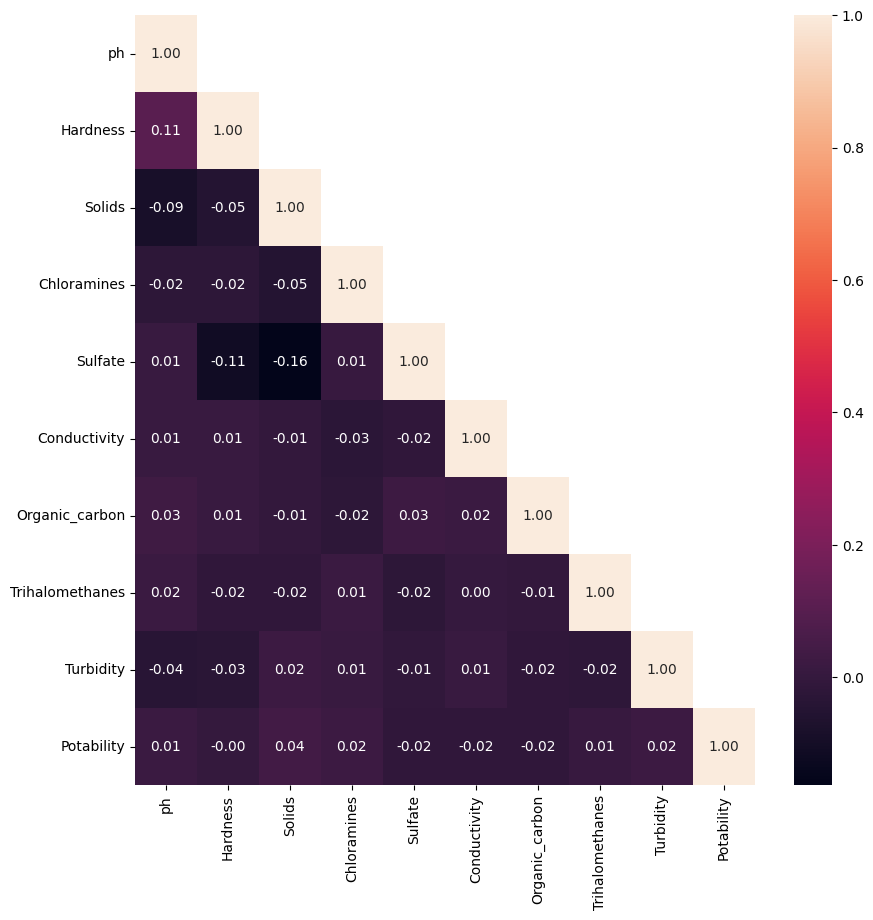

In [53]:
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr()), k=1)
sns.heatmap(df_scaled.corr(),mask=mask, annot=True, fmt=".2f");

In [54]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

# 3- Comenzamos a trabajar con modelos de Machine Learning

Dividimos los datos en variables (X) y dato a predecir (y)

In [55]:
X= df_scaled.drop('Potability', axis=1)
y= df_scaled['Potability']

Dividimos la muestra dejando un 20% de los datos para test y utilizando la seed 42 para asegurarnos su reproducibilidad

In [56]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

Lanzamos un primer Gridsearch con varios modelos de clasificacion para ver cual es la mejor opcion sin optimizar

In [57]:
pipe = Pipeline(steps=[
    ('classifier', LinearRegression())
])

logistic_params = {
    'classifier': [LogisticRegression()],
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
}
extra_trees = {
    'classifier': [ExtraTreesClassifier()],
}

ada_param = {
    'classifier': [AdaBoostClassifier()],
}

gbc_param = {
    'classifier': [GradientBoostingClassifier()],
}

xgb_param = {
    'classifier': [XGBClassifier()],
}

KNC_param = {
    'classifier': [KNeighborsClassifier()],
}

search_space = [
    logistic_params,
    random_forest_params,
    extra_trees,
    ada_param,
    gbc_param,
    xgb_param,
    KNC_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  n_jobs= -1,
                  cv = 10)

clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()]},
                         {'classifier': [RandomForestClassifier()]},
                         {'classifier': [ExtraTreesClassifier()]},
                         {'classifier': [AdaBoostClassifier()]},
                         {'classifier': [GradientBoostingClassifier()]},
                         {'classifier': [XGBClassifier(base_score=Non...
                                                       interaction_constraints=None,
                                                       learning_rate=None,
                                                       max_bin=None,
                                                       max_cat_threshold=None,
                                                       max_cat_to_onehot=None,
                                                       max_delta_step=None,
                                                       max_depth=None,
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...)]},
                         {'classifier': [KNeighborsClassifier()]}])

In [58]:
print(clf.best_estimator_)
print(clf.best_params_)

Pipeline(steps=[('classifier', RandomForestClassifier())])
0.6753649068322981
{'classifier': RandomForestClassifier()}


In [76]:
predictions = clf.predict(X_test)
clf_score= f1_score(y_test,predictions)
clf_acc= accuracy_score(y_test,predictions)
print(clf_score)
print(clf_acc)

0.5214285714285714
0.6674937965260546


Ahora vamos a optimizar todos los modelos con la idea de al final realizar un voting con los modelos ya optimizados, a ver si conseguimos mejorar el 0.67 obtenido en el Gridsearch con los modelos optimizados o con el voting final.

In [59]:
rfe = RandomForestClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "max_depth": [5,7,9],
          "random_state": [42]}

rfe_et = GridSearchCV(estimator=rfe,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

rfe_et.fit(X_train, y_train)
rfe_et.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=50, random_state=42)

In [62]:
rfe_fin=RandomForestClassifier(max_depth=9,n_estimators=50,random_state=42)
rfe_fin.fit(X_train,y_train)


RandomForestClassifier(max_depth=9, n_estimators=50, random_state=42)

In [63]:
predictions = rfe_fin.predict(X_test)
rf_score= f1_score(y_test,predictions)
rfe_acc= accuracy_score(y_test,predictions)
print(rf_score)
print(rfe_acc)

0.5039370078740157
0.6873449131513648


In [64]:
et = ExtraTreesClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "max_depth": [5,7,9],
          "random_state": [42]}

et_et = GridSearchCV(estimator=et,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

et_et.fit(X_train, y_train)
et_et.best_estimator_

ExtraTreesClassifier(max_depth=9, n_estimators=200, random_state=42)

In [65]:
et_fin= ExtraTreesClassifier(max_depth=9, n_estimators=200, random_state=42)
et_fin.fit(X_train,y_train)
predictions = et_fin.predict(X_test)
et_score=f1_score(y_test,predictions)
et_acc= accuracy_score(y_test,predictions)
print(et_score)
print(et_acc)

0.2660098522167488
0.630272952853598


In [66]:
gbc = GradientBoostingClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "max_depth": [5,7,9],
          "random_state": [42]}

gbc_et = GridSearchCV(estimator=rfe,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

gbc_et.fit(X_train, y_train)
gbc_et.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=50, random_state=42)

In [67]:
gbc_fin= GradientBoostingClassifier(max_depth=9,n_estimators=50,random_state=42)
gbc_fin.fit(X_train,y_train)
predictions = gbc_fin.predict(X_test)
gbc_score= f1_score(y_test,predictions)
gbc_acc=accuracy_score(y_test,predictions)
print(gbc_score)
print(gbc_acc)

0.49824561403508777
0.6451612903225806


In [68]:
ada = AdaBoostClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "learning_rate": [1,1.5,2,2.5],
          "random_state": [42]}

ada_et = GridSearchCV(estimator=ada,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

ada_et.fit(X_train, y_train)
ada_et.best_estimator_

AdaBoostClassifier(learning_rate=2, random_state=42)

In [69]:
ada_fin= AdaBoostClassifier(learning_rate=2,random_state=42)
ada_fin.fit(X_train,y_train)
predictions = ada_fin.predict(X_test)
ada_score= f1_score(y_test,predictions)
ada_acc=accuracy_score(y_test,predictions)
print(ada_score)
print(ada_acc)

0.5825932504440497
0.41687344913151364


In [70]:
knc = KNeighborsClassifier()

params = {"n_neighbors":[5,7,9,11]}

knc_et = GridSearchCV(estimator=knc,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

knc_et.fit(X_train, y_train)
knc_et.best_estimator_

KNeighborsClassifier()

In [71]:
knc_fin= KNeighborsClassifier(n_neighbors=7)
knc_fin.fit(X_train,y_train)
predictions = knc_fin.predict(X_test)
knc_score= f1_score(y_test,predictions)
knc_acc= accuracy_score(y_test,predictions)
print(knc_score)
print(knc_acc)

0.4236111111111111
0.5880893300248139


In [72]:
xgb = XGBClassifier()

params = {"n_estimators": [50, 100, 150, 200, 300],
          "max_depth": [5,7,9],
          "random_state": [42]}

gbc_et = GridSearchCV(estimator=xgb,
                      param_grid=params,
                      n_jobs=-1,
                      cv=10,
                      scoring="f1")

gbc_et.fit(X_train, y_train)
gbc_et.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [73]:
xbc_fin=XGBClassifier(max_depth=7,n_estimators=200,random_state=42)
xbc_fin.fit(X_train,y_train)
predictions = xbc_fin.predict(X_test)
xbc_score= f1_score(y_test,predictions)
xbc_acc=accuracy_score(y_test,predictions)
print(xbc_score)
print(xbc_acc)

0.5175718849840256
0.6253101736972705


In [74]:
from sklearn.ensemble import VotingClassifier
rfc = RandomForestClassifier(max_depth=9,n_estimators=50,random_state=42)
etc= ExtraTreesClassifier(max_depth=9, n_estimators=200, random_state=42)
ada= AdaBoostClassifier(learning_rate=2,random_state=42)
gbc= GradientBoostingClassifier(max_depth=9,n_estimators=50,random_state=42)
xgb= XGBClassifier(max_depth=7,n_estimators=200,random_state=42)
knc= KNeighborsClassifier(n_neighbors=7)
estimators = [('rfc', rfc), 
                ('etc', etc), 
                ('ada', ada),
                ('gbc', gbc),   
                ("xgb", xgb),
                ('knc', knc)]
voting_clf = VotingClassifier(estimators=estimators)
voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)
voting_score= f1_score(y_test,predictions)
voting_acc= accuracy_score(y_test,predictions)
print(voting_score)
print(voting_acc)

0.45418326693227085
0.6600496277915633


Creamos un dataframe con las accuracy de todos los modelos entrenados y miramos cual es el que tiene mayor accuracy

In [77]:
scores_dict={'Gridsearch':clf_score,
             'Randomforest':rf_score,
             'ExtraTrees':et_score,
             'Gradientboosting':gbc_score,
             'Adaboost':ada_score,
             'Kneigbors':knc_score,
             'XGB':xbc_score,
             'voting':voting_score}
df_score = pd.DataFrame(list(scores_dict.items()), columns=['Modelo', 'f1_score'])
df_score['Accuracy'] = [clf_acc,rfe_acc,et_acc,gbc_acc,ada_acc,knc_acc,xbc_acc,voting_acc]
df_score = df_score.sort_values(by='Accuracy', ascending=False)
df_score

,Modelo,f1_score,Accuracy
1,Randomforest,0.503937,0.687345
0,Gridsearch,0.521429,0.667494
7,voting,0.454183,0.660050
3,Gradientboosting,0.498246,0.645161
2,ExtraTrees,0.266010,0.630273
6,XGB,0.517572,0.625310
5,Kneigbors,0.423611,0.588089
4,Adaboost,0.582593,0.416873


El mejor modelo es el Randomforest, asi que lo reentrenamos como modelo final y miramos sus metricas finales (score, accuracy y confusion matrix). La matriz de confusion es aceptable porque debido a la naturaleza del parametro a predecir que es la potabilidad o no del agua hay que centrarse en los falsos positivos, y solo 18 veces dijo que el agua era 'potable' cuando era 'no potable'

In [78]:
final_model=RandomForestClassifier(max_depth=9,n_estimators=50,random_state=42)
final_model.fit(X_train,y_train)
predictions = final_model.predict(X_test)
final_model_score= f1_score(y_test,predictions)
final_model_acc= accuracy_score(y_test,predictions)
c_matrix = confusion_matrix(y_test, predictions)
print(final_model_score)
print(final_model_acc)
print(c_matrix)

0.5039370078740157
0.6873449131513648
[[213  18]
 [108  64]]


Como hemos escalado los datos, metemos el escalador y el modelo en un pipe para que actuen a la vez cuando hagamos predicciones.


In [79]:
pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("rfc", RandomForestClassifier(max_depth=9,n_estimators=50,random_state=42))
    
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rfc',
                 RandomForestClassifier(max_depth=9, n_estimators=50,
                                        random_state=42))])

In [80]:
pipe.score(X_test, y_test)

0.6873449131513648

Sacamos el feature importance para saber el peso de cada parametro del modelo

In [84]:
pd.DataFrame(pipe["rfc"].feature_importances_, columns=["importance"], index=X.columns).sort_values("importance", ascending=False)

,importance
ph,0.175973
Sulfate,0.169178
Chloramines,0.121848
Hardness,0.121107
Solids,0.105159
Trihalomethanes,0.085401
Conductivity,0.074915
Turbidity,0.073391
Organic_carbon,0.073028


Guardamos el modelo para poder implementarlo en la app y realizar predicciones

In [85]:
with open('modelo.pkl', 'wb') as file:
    pickle.dump(pipe, file)